In [0]:
choose_models = ["MobileNet", "VGG16", "InceptionV3"]
##### This is the the place, where we choose the models. Kindly select 0,1,2 from choose_models
selected_model = choose_models[0] ### Change value according
img_size = 128 ### Select size of image (32, 64, 128). By default, we choose 128
                      

In [0]:
import cv2
from os import listdir
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np
from scipy import ndimage, misc
import cv2
from os import listdir
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np
from scipy import ndimage, misc
import tensorflow as tf
#import keras
#from keras.models import Sequential
#from keras.layers import Dense, ZeroPadding2D, Conv2D, BatchNormalization, Activation, AveragePooling2D, DepthwiseConv2D, Flatten, Reshape, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization, Activation
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import VGG16
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization, Activation
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import VGG16
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ZeroPadding2D, Conv2D, BatchNormalization, Activation, AveragePooling2D, DepthwiseConv2D, Flatten, Reshape, GlobalAveragePooling2D
#import keras
#from keras.models import Sequential
#from keras.layers import Dense, ZeroPadding2D, Conv2D, BatchNormalization, Activation, AveragePooling2D, DepthwiseConv2D, Flatten, Reshape, GlobalAveragePooling2D
#import keras
print(tf.__version__)

In [0]:
##
# load all images in Training Directory
##
loaded_images = list()
loaded_y = list()
X_test = list()
#img_size =128
!pwd
path ='./stanford_results/Images/'
clas_folder = path
dict={}
list_clas_folder = listdir(clas_folder)
#list_clas_folder.remove('.DS_Store')

/home/ecbm4040


./stanford_results/Images/n02105855-Shetland_sheepdog/n02105855_2933.jpg
Data Loaded


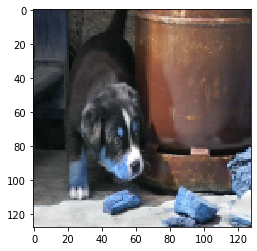

In [0]:
num_classes = len(list_clas_folder)

for i in range(num_classes):
    dict[str(i)] = list_clas_folder[i]
    folder_name = list_clas_folder[i]
    image_path = clas_folder + folder_name
    for filename in listdir(image_path):
        im2 = cv2.imread(image_path +'/'+ filename, cv2.IMREAD_UNCHANGED)
        img_data = cv2.resize(im2, (img_size, img_size),interpolation = cv2.INTER_AREA)
        if img_data.shape == (img_size, img_size, 3):
            loaded_images.append(img_data)
            loaded_y.append(i)
        else: 
            print(image_path +'/'+ filename)
print("Data Loaded")
plt.imshow(loaded_images[7])

In [0]:
seq = np.arange(len(loaded_y))
np.random.shuffle(seq)
print("shuffling..")
len(seq)
X_train1 = list()
y_train1 = list()
#loaded_images = loaded_images*(1.0/255)
for i in range(len(seq)):
    X_train1.append(loaded_images[seq[i]])
    y_train1.append(loaded_y[seq[i]])

shuffling..


(128, 128, 3)


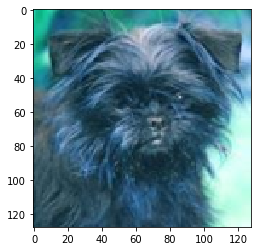

In [0]:


print(X_train1[10].shape)
X_train = np.asarray(X_train1)
plt.imshow(X_train[3])


shuffling done...
All data Loaded..


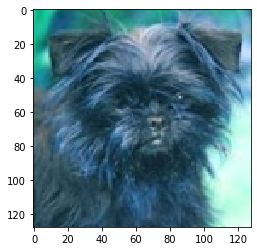

In [0]:
X_train  = X_train*(1./255)
y_train = np.asarray(y_train1)
print("shuffling done...")
print("All data Loaded..")
plt.imshow(X_train[3])

In [0]:
from tensorflow.keras.utils import to_categorical as one_hot
y_train = one_hot(y_train)
print("y_train_shape = " , y_train.shape)
X_val = X_train[-1000:]
y_val = y_train[-1000:]
X_test = X_train[-2000:-1000]
y_test = y_train[-2000:-1000]
X_train = X_train[:-2000]
y_train = y_train[:-2000]
print("X_val_shape = " ,X_val.shape)
print("X_train_shape = " ,X_train.shape)

y_train_shape =  (20579, 120)
X_val_shape =  (1000, 128, 128, 3)
X_train_shape =  (18579, 128, 128, 3)


In [0]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

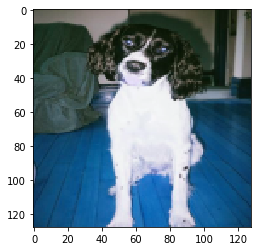

In [0]:
plt.imshow(X_train[7])
datagen.fit(X_train)
plt.imshow(X_train[7])


In [0]:
X_train.shape

(18579, 128, 128, 3)

In [0]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.inception_V3 import InceptionV3
if selected_model == "MobileNet":
  base_model = MobileNet(include_top = False, weights ='imagenet', input_shape = (img_size,img_size,3))
  x = base_model.output
  x = Conv2D(64, kernel_size=1, strides=1, activation = 'relu')(x)
  x = Flatten()(x)
  x = Dense(256, activation ='relu')(x)
  x = BatchNormalization()(x)
  x = Dense(256, activation ='relu')(x)
  x = BatchNormalization()(x)
  x = Dense(128, activation ='relu')(x)
  x = BatchNormalization()(x)
  pred = Dense(120, activation ='softmax')(x)
  model = Model(inputs = base_model.input, outputs = pred)
  print(len(model.layers))
  for layer in model.layers[:-10]:
      layer.trainable =False
  for layer in model.layers[-10:]:
      layer.trainable = True




if selected_model == "VGG16":
  base_model = VGG16(include_top = False, weights ='imagenet', input_shape = (img_size,img_size,3))
  x = base_model.output
  x = Conv2D(64, kernel_size=2, strides=1, activation = 'relu')(x)
  x = Flatten()(x)
  x = Dense(256, activation ='relu')(x)
  x = BatchNormalization()(x)
  x = Dense(256, activation ='relu')(x)
  x = BatchNormalization()(x)
  x = Dense(128, activation ='relu')(x)
  x = BatchNormalization()(x)
  pred = Dense(120, activation ='softmax')(x)
  model = Model(inputs = base_model.input, outputs = pred)
  print(len(model.layers))
  for layer in model.layers[:-10]:
      layer.trainable =False
  for layer in model.layers[-10:]:
      layer.trainable = True


if selected_model == "InceptionV3":
  if img_size<75:
    print("Please select image_size above 75")
    break
  base_model = InceptionV3(include_top = False, weights ='imagenet', input_shape = (img_size,img_size,3))
  x = base_model.output
  x = Conv2D(128, kernel_size=1, strides=1, activation = 'relu')(x)
  x = Flatten()(x)
  x = Dense(256, activation ='relu')(x)
  x = BatchNormalization()(x)
  pred = Dense(120, activation ='softmax')(x)
  model = Model(inputs = base_model.input, outputs = pred)
  print(len(model.layers))
  for layer in model.layers[:-5]:
      layer.trainable =False
  for layer in model.layers[-5:]:
      layer.trainable = True


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
__________

In [0]:
#model = Model(inputs=model.input, outputs =preds)
from tensorflow.keras.optimizers import Adam as Adam

adam = Adam(lr=0.001)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
#history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))
model.fit_generator(datagen.flow(X_train, y_train, batch_size=256),
                    steps_per_epoch=len(X_train) / 256, epochs=15, validation_data = (X_val, y_val))

Epoch 1/15
73/73 [==============================] - 65s 887ms/step - loss: 3.9490 - acc: 0.1221 - val_loss: 3.7886 - val_acc: 0.1760
Epoch 2/15
73/73 [==============================] - 62s 856ms/step - loss: 2.7611 - acc: 0.3019 - val_loss: 2.2837 - val_acc: 0.3760
Epoch 3/15
73/73 [==============================] - 64s 873ms/step - loss: 2.2828 - acc: 0.3919 - val_loss: 1.9347 - val_acc: 0.4490
Epoch 4/15
73/73 [==============================] - 63s 861ms/step - loss: 2.0354 - acc: 0.4480 - val_loss: 1.9010 - val_acc: 0.4490
Epoch 5/15
73/73 [==============================] - 63s 864ms/step - loss: 1.8847 - acc: 0.4801 - val_loss: 1.8512 - val_acc: 0.4670
Epoch 6/15
73/73 [==============================] - 63s 868ms/step - loss: 1.7815 - acc: 0.5020 - val_loss: 1.8642 - val_acc: 0.4850
Epoch 7/15
73/73 [==============================] - 63s 864ms/step - loss: 1.6976 - acc: 0.5235 - val_loss: 1.7486 - val_acc: 0.5120
Epoch 8/15
73/73 [==============================] - 63s 861ms/step - 

In [0]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)

1000/1000 [==============================] - 2s 2ms/sample - loss: 1.9036 - acc: 0.4940


In [0]:
# Save the model
if selected_model == "MobileNet":
  model.save('trained_mobilenet_128_dog_data.h5')
if selected_model == "VGG16":
  model.save('trained_VGG16_128_dog_data.h5')
if selected_model == "InceptionV3":
  model.save('trained_InceptionV3_128_dog_data.h5')

In [0]:
# Recreate the exact same model purely from the file
from keras.models import load_model
#new_model = load_model('path_to_my_model.h5')
classifierLoad = tf.keras.models.load_model('path_to_my_model.h5')

In [0]:
classifierLoad.summary()